In [1]:
'스포츠 및 레크레이션 용품 임대업', '여관업', '여행사업', '욕탕업', '육류 소매업', '일반유흥 주점업', '일식 음식점업' '자동차 임대업' '전시 및 행사 대행업','정기 항공 운송업', '중식 음식점업', '차량용 가스 충전업', '차량용 주유소 운영업', '체인화 편의점','택시 운송업''피자 햄버거 샌드위치 및 유사 음식점업', '한식 음식점업', '호텔업', '화장품 및 방향제 소매업', '휴양콘도 운영업',

('스포츠 및 레크레이션 용품 임대업',
 '여관업',
 '여행사업',
 '욕탕업',
 '육류 소매업',
 '일반유흥 주점업',
 '일식 음식점업자동차 임대업전시 및 행사 대행업',
 '정기 항공 운송업',
 '중식 음식점업',
 '차량용 가스 충전업',
 '차량용 주유소 운영업',
 '체인화 편의점',
 '택시 운송업피자 햄버거 샌드위치 및 유사 음식점업',
 '한식 음식점업',
 '호텔업',
 '화장품 및 방향제 소매업',
 '휴양콘도 운영업')

In [2]:
# 한글문제 해결처리 
################################################################
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
import platform
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
# 경고문 숨기기
import warnings
warnings.filterwarnings(action='ignore')

In [5]:
sports = pd.read_csv("업종별/스포츠 및 레크레이션 용품 임대업.csv", encoding='utf-8', index_col=0,parse_dates=['REG_YYMM'])

In [7]:
print(sports.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466533 entries, 0 to 466532
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      466533 non-null  object
 1   CARD_SIDO_NM  466533 non-null  object
 2   CARD_CCG_NM   465790 non-null  object
 3   STD_CLSS_NM   466533 non-null  object
 4   HOM_SIDO_NM   466533 non-null  object
 5   HOM_CCG_NM    464178 non-null  object
 6   AGE           466533 non-null  object
 7   SEX_CTGO_CD   466533 non-null  int64 
 8   FLC           466533 non-null  int64 
 9   CSTMR_CNT     466533 non-null  int64 
 10  AMT           466533 non-null  int64 
 11  CNT           466533 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 46.3+ MB
None


In [9]:
#안쓰는 컬럼 드랍
df=sports.drop(['CARD_CCG_NM', 'HOM_CCG_NM', 'STD_CLSS_NM'], axis=1)

In [10]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [11]:
df = df.fillna('')
df['year'] = df['REG_YYMM'].apply(lambda x: grap_year(x))
df['month'] = df['REG_YYMM'].apply(lambda x: grap_month(x))

In [12]:
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466533 entries, 0 to 466532
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   REG_YYMM      466533 non-null  object
 1   CARD_SIDO_NM  466533 non-null  object
 2   HOM_SIDO_NM   466533 non-null  object
 3   AGE           466533 non-null  object
 4   SEX_CTGO_CD   466533 non-null  int64 
 5   FLC           466533 non-null  int64 
 6   CSTMR_CNT     466533 non-null  int64 
 7   AMT           466533 non-null  int64 
 8   CNT           466533 non-null  int64 
 9   year          466533 non-null  int64 
 10  month         466533 non-null  int64 
dtypes: int64(7), object(4)
memory usage: 42.7+ MB
None
  REG_YYMM CARD_SIDO_NM HOM_SIDO_NM  AGE  SEX_CTGO_CD  FLC  CSTMR_CNT  \
0   201901           강원          강원  10s            2    1          3   
1   201901           강원          강원  20s            1    1        149   
2   201901           강원          강원  20s            1  

In [13]:
df.CARD_SIDO_NM.unique()
#17개 모든 시도에서 관찰

array(['강원', '경기', '경남', '경북', '광주', '대구', '대전', '부산', '서울', '세종', '울산',
       '인천', '전남', '전북', '제주', '충남', '충북'], dtype=object)

In [14]:
df.HOM_SIDO_NM.unique()
#17개 모든 시도에서 관찰

array(['강원', '경기', '서울', '인천', '경북', '세종', '충남', '충북', '경남', '대구', '대전',
       '부산', '울산', '제주', '광주', '전북', '전남'], dtype=object)

In [15]:
df1 = df.groupby('CARD_SIDO_NM')['AMT'].sum().sort_values()
df1

CARD_SIDO_NM
세종      2279662030
대전     16479833714
울산     23331735124
제주     33344611929
충북     35182341623
강원     42806575847
전남     45615333165
충남     49118544510
광주     50899631640
대구     58318444868
전북     62364216693
경남     70645334737
경북     71643797215
인천     82662569813
부산     91958685641
경기    227848097783
서울    281226010421
Name: AMT, dtype: int64

Text(0.5, 1.0, '스포츠 및 레크레이션 용품 임대업 지역별 AMT')

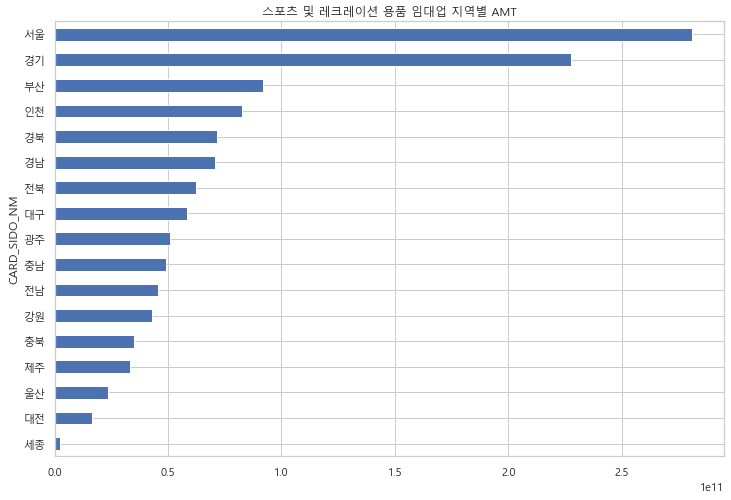

In [16]:
df1.plot(kind="barh", figsize=(12,8))
plt.title("스포츠 및 레크레이션 용품 임대업 지역별 AMT")

-

REG_YYMM
201901     78021981663
201902     73598344126
201903     97060111807
201904     98609449610
201905    111070649958
201906     87913049770
201907     78489783259
201908     64761578680
201909     81662451205
201910    103209024361
201911    104605247860
201912     90233827188
202001     67670588226
202002     50467157264
202003     58352181776
Name: AMT, dtype: int64


Text(0.5, 1.0, '기간별 AMT')

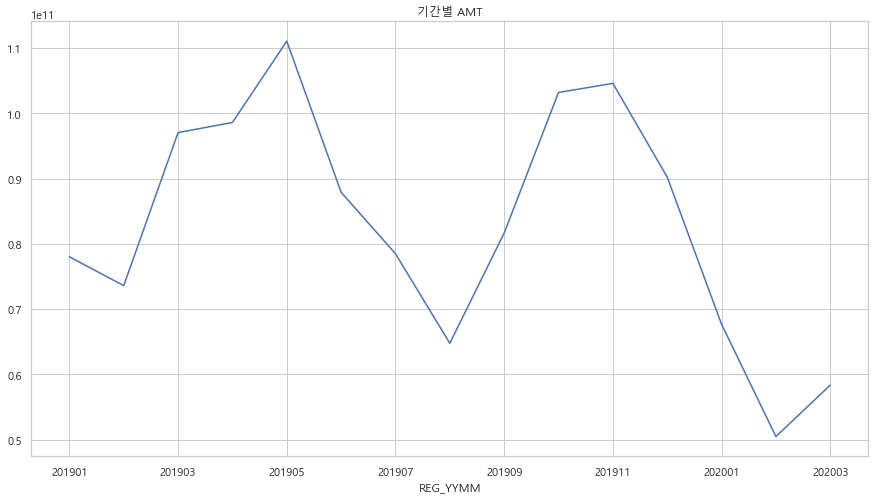

In [17]:
df2 = df.groupby('REG_YYMM')['AMT'].sum()
print(df2)
df2.plot(figsize=(15,8))
plt.title("기간별 AMT")

-성수기 비성수기가 확실하게 그래프에서 보임  
-임대업이라서 그런가? 오히려 8월이 낮음

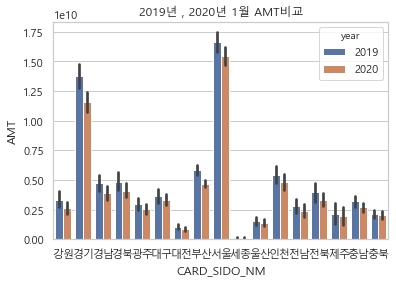

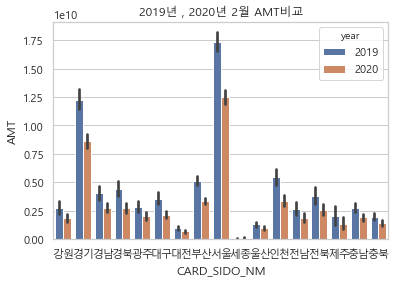

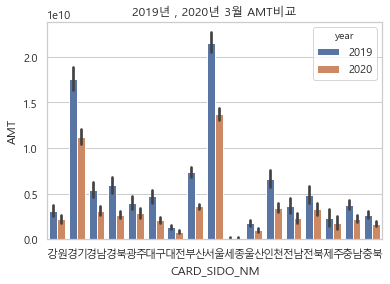

In [19]:
for i in range(1, 4):
    df_month = df[df.month == i]
    sns.barplot(data = df_month, x = 'CARD_SIDO_NM', y = 'AMT', hue = 'year',  estimator = sum)
    plt.title("2019년 , 2020년 %d월 AMT비교" %i)
    plt.show()

-1월은 감소폭이 적지만...2,3월에 급감하는 모습. : 4월에도 별로 높을 거 같지 않음   
-7월은 글쎄...?

AGE
10s      2179585389
20s    117476718572
30s    173691994448
40s    268877825229
50s    392101330699
60s    238411067544
70s     52986904872
Name: AMT, dtype: int64


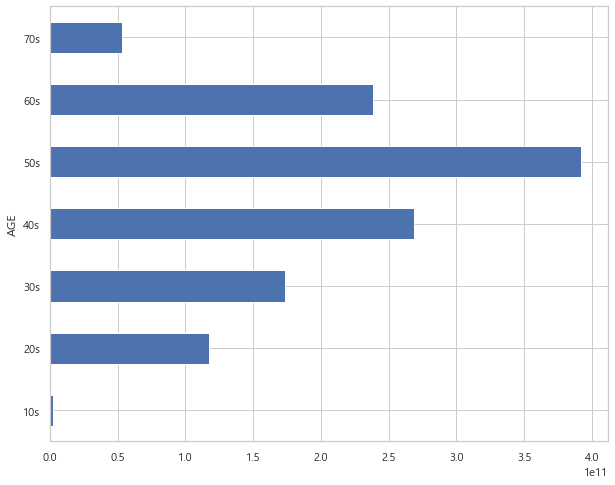

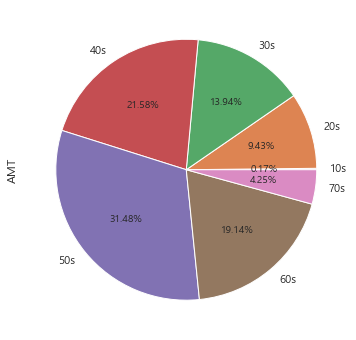

In [20]:
df3 = df.groupby('AGE')['AMT'].sum()
print(df3)
df3.plot(kind='barh', figsize=(10,8))
plt.show()
df3.plot(kind='pie',autopct='%1.2f%%',figsize=(6,6))

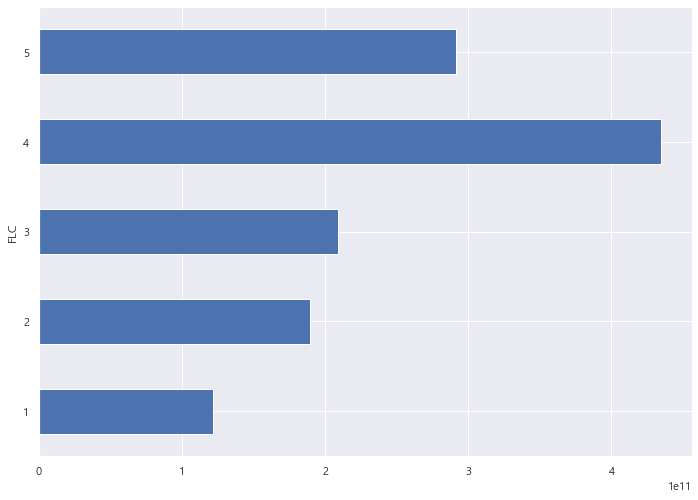

In [22]:
FLC = df.groupby('FLC')['AMT'].sum()
FLC.plot(kind='barh')

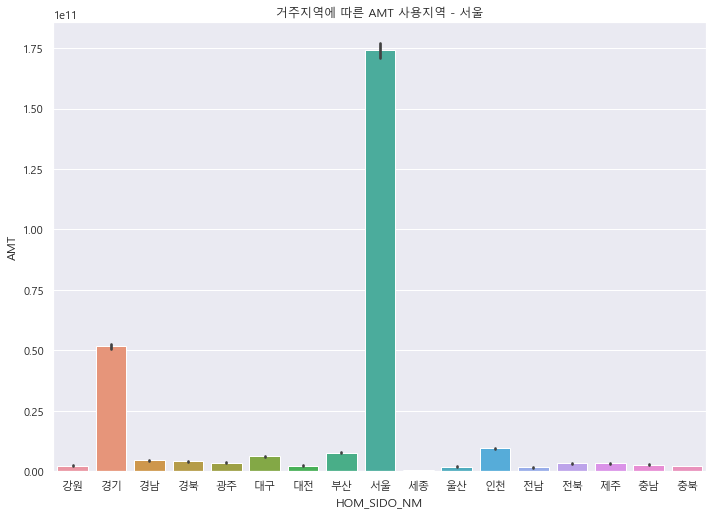

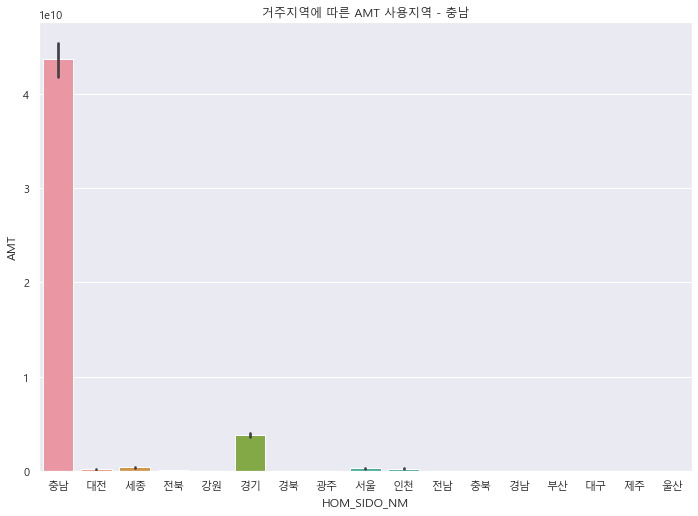

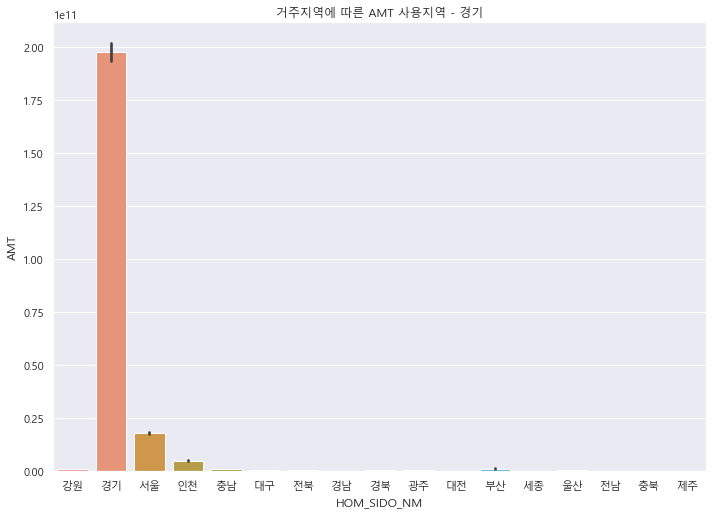

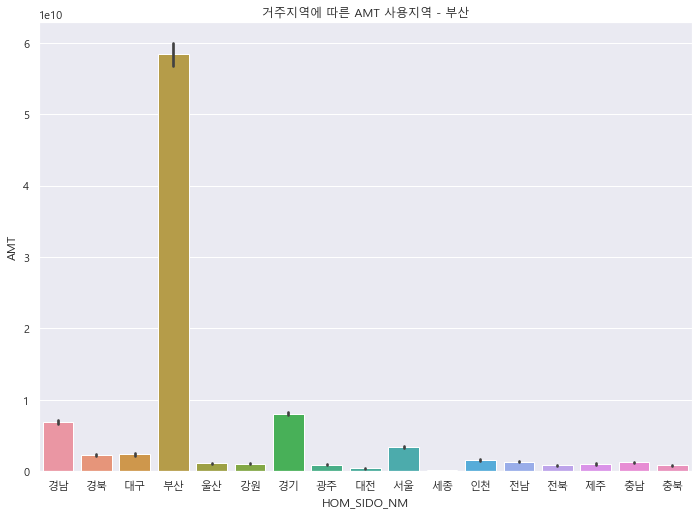

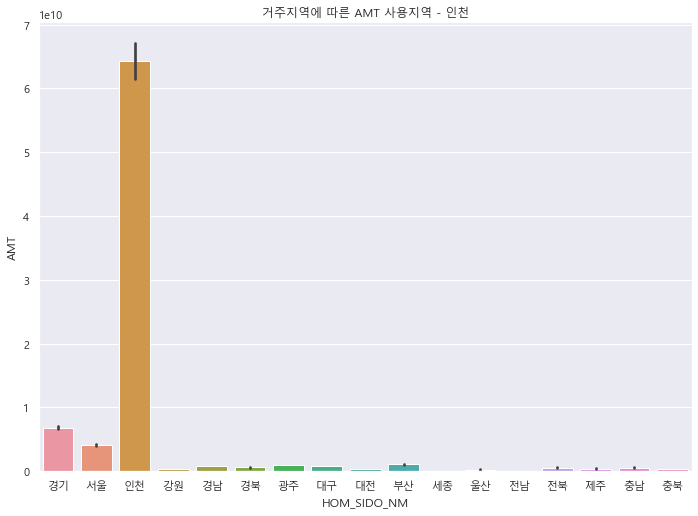

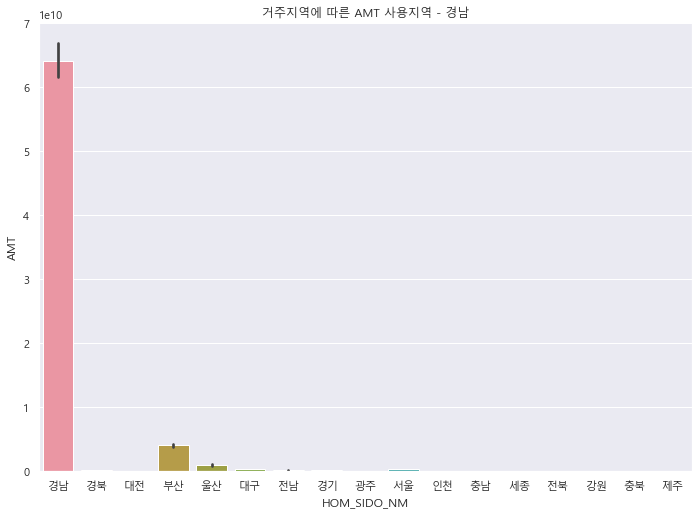

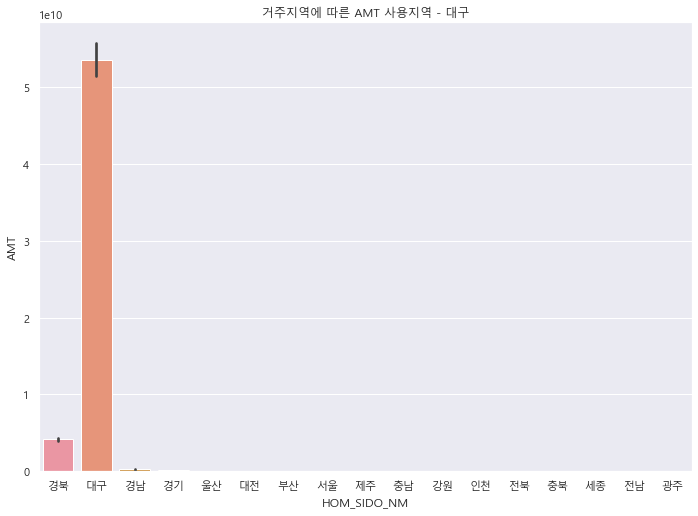

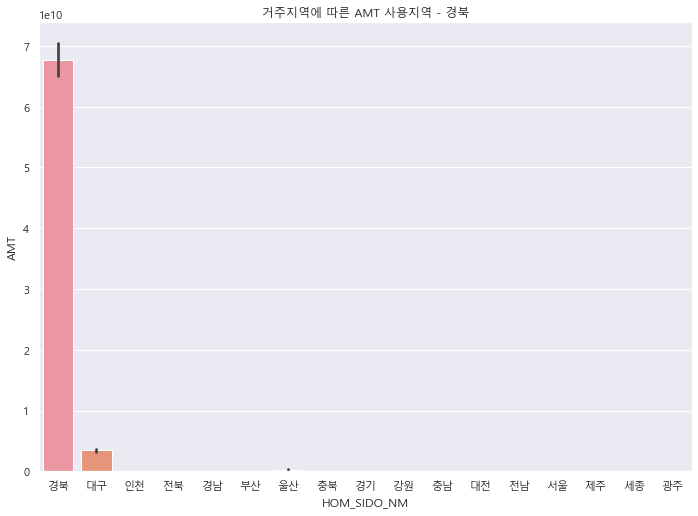

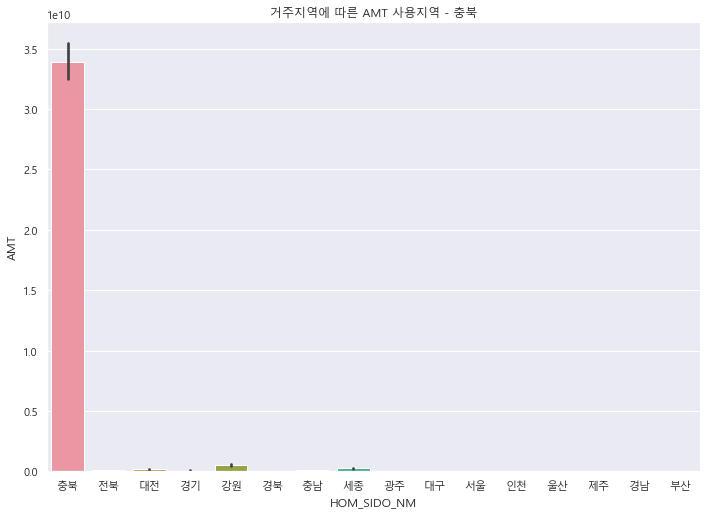

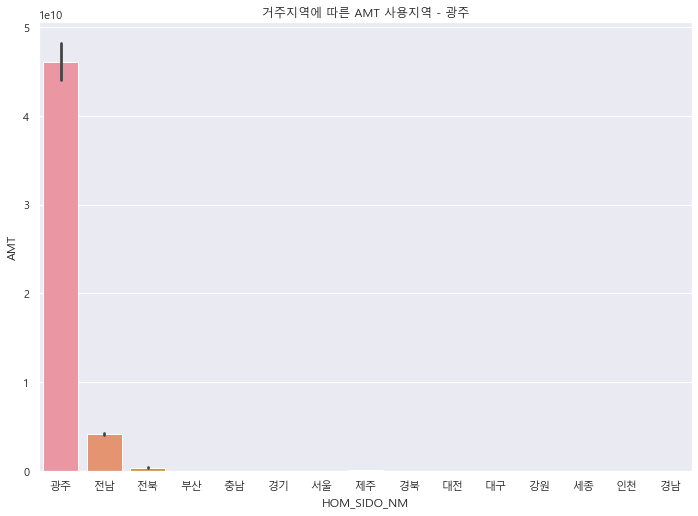

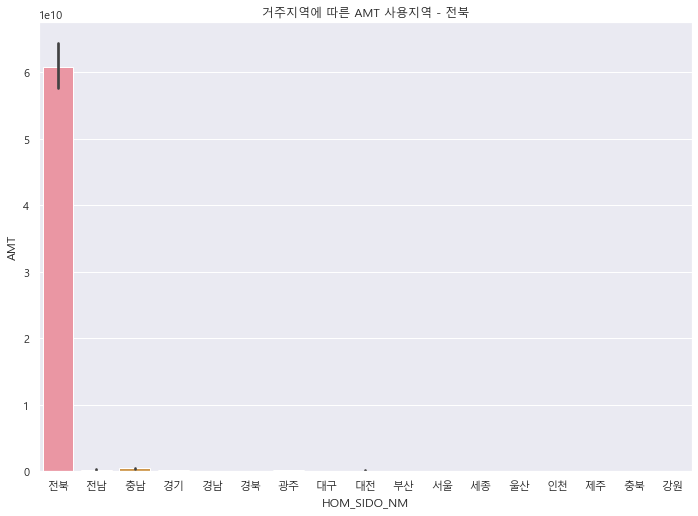

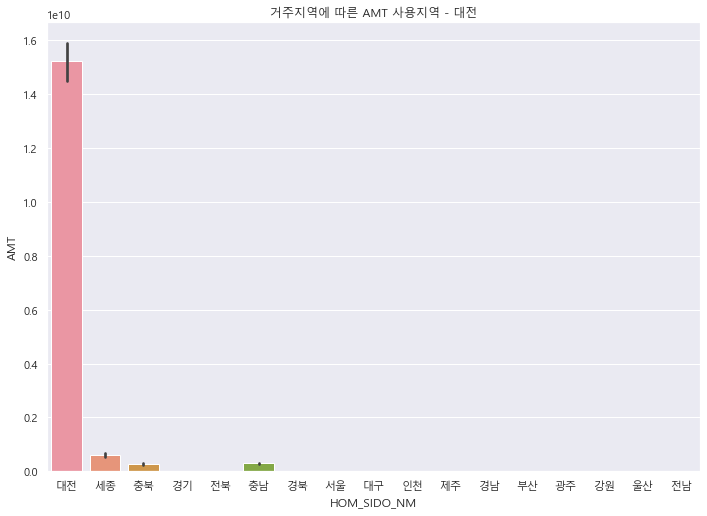

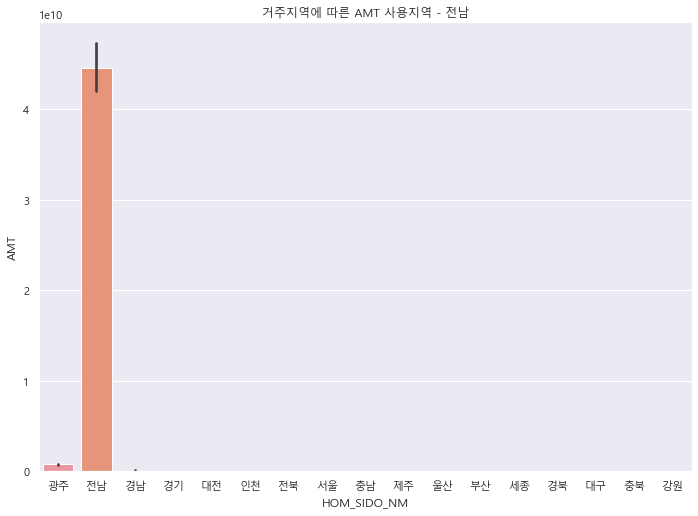

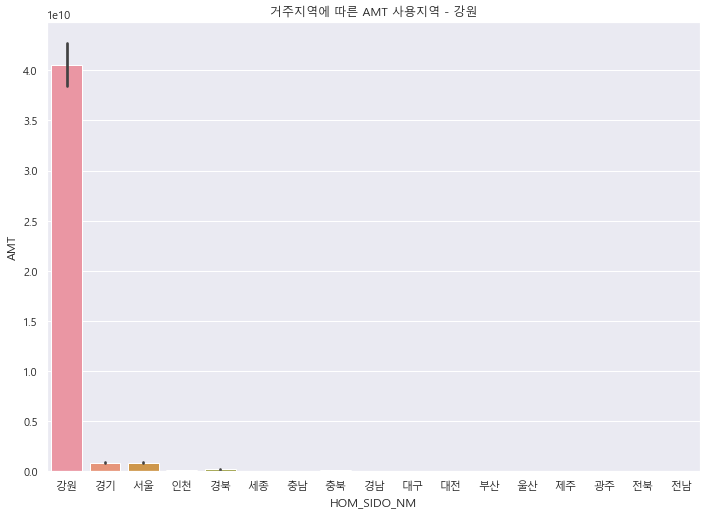

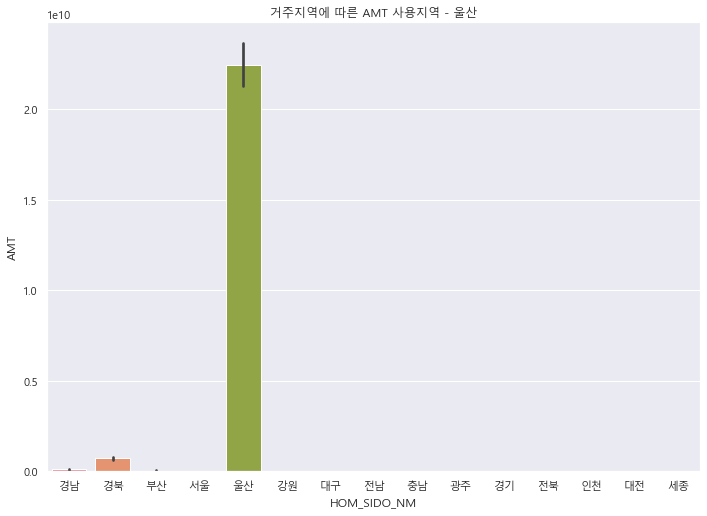

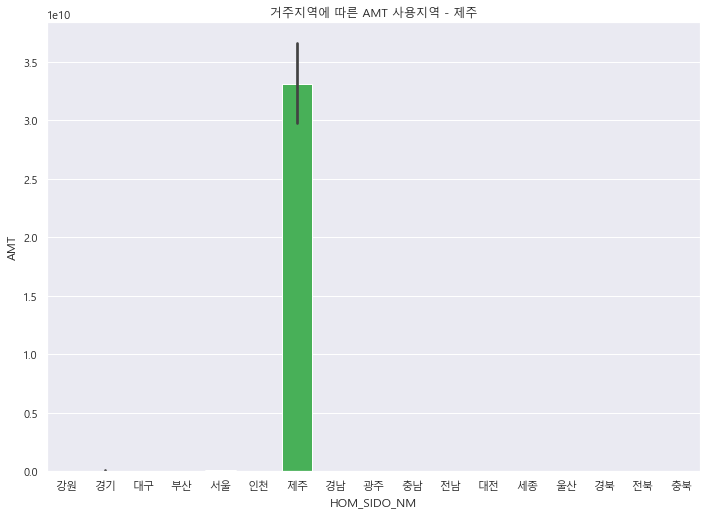

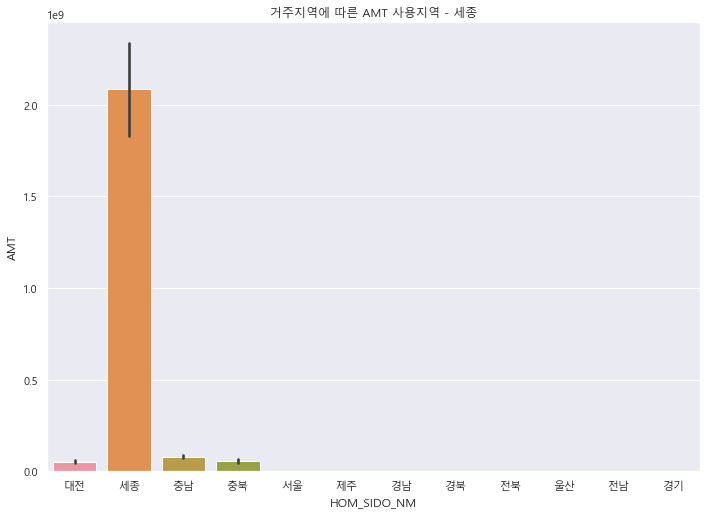

In [21]:
cols = ['서울', '충남', '경기', '부산', '인천','경남', '대구', '경북', '충북', '광주','전북','대전', '전남', '강원', '울산', '제주', '세종']
    
for val in cols:
    sns.set(rc={'figure.figsize':(11.7,8.27)})
    plt.rcParams['font.family'] = 'Malgun Gothic'
    sns.barplot(data = df[df.CARD_SIDO_NM == val], x = 'HOM_SIDO_NM', y = 'AMT',  estimator = sum)
    plt.title('거주지역에 따른 AMT 사용지역 - ' + val)
    plt.show()